# import required modules

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
import re

In [5]:
import nltk
import string
import warnings 
warnings.filterwarnings('ignore')

# import dataset

In [50]:
df=pd.read_csv("Twitter Sentiments.csv")

In [51]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# Preprocessing the dataset

Removing @user pattern from tweets using 're' :

In [52]:
def remove_pattern(input_text,pattern):
    r=re.findall(pattern,input_text)
    for words in r:
        input_text=re.sub(words,"",input_text)
    return input_text
        

In [53]:
df['Clean_Tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [54]:
df

,id,label,tweet,Clean_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


In [55]:
df['Clean_Tweet']=df['Clean_Tweet'].str.replace("[^a-zA-z#]"," ")

In [56]:
df

,id,label,tweet,Clean_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised in in #calgary #wso...


Removing short words

In [57]:
df['Clean_Tweet']=df['Clean_Tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [58]:
df

,id,label,tweet,Clean_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwaves trying wrap herself mantl...
31959,31960,0,listening to sad songs on a monday morning otw...,listening songs monday morning work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #temple vandalised #calgary #wso condemns


In [59]:
#words will be considerd as tokens
tokenised_tweet=df['Clean_Tweet'].apply(lambda x:x.split())

In [60]:
tokenised_tweet
##words converted into indivisual tokens

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwaves, trying, wrap, herself...
31959            [listening, songs, monday, morning, work]
31960    [#sikh, #temple, vandalised, #calgary, #wso, c...
31961                                      [thank, follow]
Name: Clean_Tweet, Length: 31962, dtype: object

In [61]:
#stemming the words
from nltk.stem.porter import PorterStemmer

In [62]:
stemmer=PorterStemmer()


In [63]:
tokenised_tweet = tokenised_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [64]:
tokenised_tweet

0        [when, father, dysfunct, selfish, drag, kid, i...
1        [thank, #lyft, credit, caus, they, offer, whee...
2                                  [bihday, your, majesti]
3                         [#model, love, take, with, time]
4                             [factsguid, societi, #motiv]
                               ...                        
31957                                        [that, youuu]
31958    [nina, turner, airwav, tri, wrap, herself, man...
31959                   [listen, song, monday, morn, work]
31960    [#sikh, #templ, vandalis, #calgari, #wso, cond...
31961                                      [thank, follow]
Name: Clean_Tweet, Length: 31962, dtype: object

In [65]:
# convert words in sentence
for i in range(len(tokenised_tweet)):
    tokenised_tweet[i]=" ".join(tokenised_tweet[i])

In [66]:
df['Clean_Tweet']=tokenised_tweet

In [67]:
df

,id,label,tweet,Clean_Tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...,that youuu
31958,31959,0,to see nina turner on the airwaves trying to...,nina turner airwav tri wrap herself mantl genu...
31959,31960,0,listening to sad songs on a monday morning otw...,listen song monday morn work
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",#sikh #templ vandalis #calgari #wso condemn


#  Exploratory data analysis

In [69]:
all_words=" ".join(sentence for sentence in df['Clean_Tweet'])
## all the sentences will be converted into single string


'when father dysfunct selfish drag kid into dysfunct #run thank #lyft credit caus they offer wheelchair van #disapoint #getthank bihday your majesti #model love take with time factsguid societi #motiv huge fare talk befor they leav chao disput when they there #allshowandnogo camp tomorrow danni next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl love land #allin #cav #champion #cleveland #clevelandcavali welcom here #ireland consum price index climb from previou #blog #silver #gold #forex selfish #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love daddi today day #gettingf #cnn call #michigan middl school build wall chant #tcot comment #australia #opkillingbay #seashepherd #helpcovedolphin #thecov #helpcovedolphin ouch junior angri #got #junior #yugyoem #omg thank have paner #thank #posit retweet agre #friday smile around user #cooki make peopl know essenti oil made chemic #euro peopl 

In [74]:
!pip install wordcloud
from wordcloud import WordCloud

     |████████████████████████████████| 160 kB 1.6 MB/s eta 0:00:01


In [75]:
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

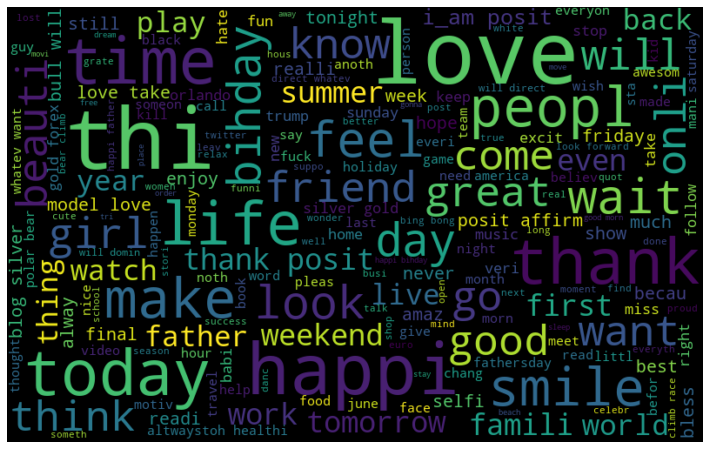

In [76]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [79]:
all_words1=" ".join(sentence for sentence in df['Clean_Tweet'][df['label']==0])

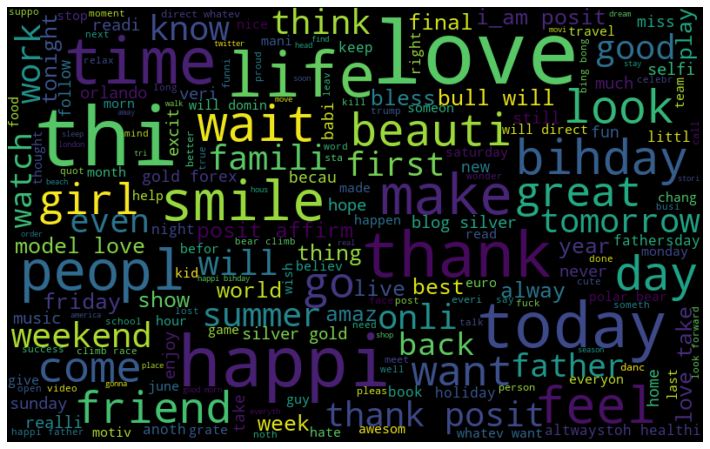

In [80]:
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words1)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

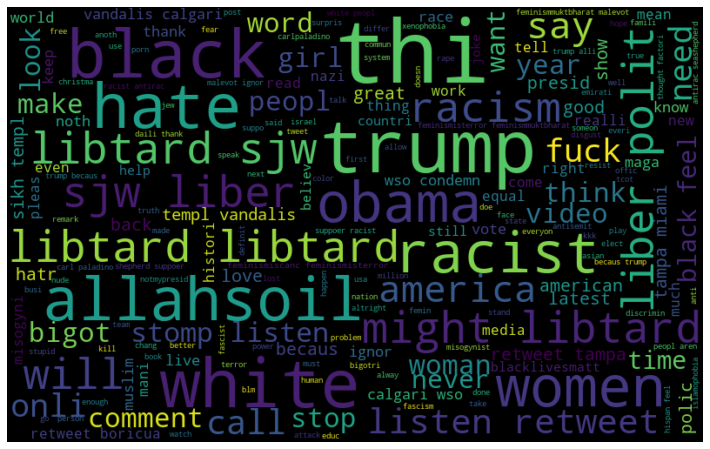

In [81]:
all_words2=" ".join(sentence for sentence in df['Clean_Tweet'][df['label']==1])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

Extracting hashtags from string 

In [82]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags   

In [84]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['Clean_Tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Clean_Tweet'][df['label']==1])

In [85]:
ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [86]:
ht_positive=sum(ht_positive,[])

In [87]:
ht_negative=sum(ht_negative,[])

In [91]:
ht_negative[:6]

['cnn', 'michigan', 'tcot', 'australia', 'opkillingbay', 'seashepherd']

In [92]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


Selecting top 10 hashtags:

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

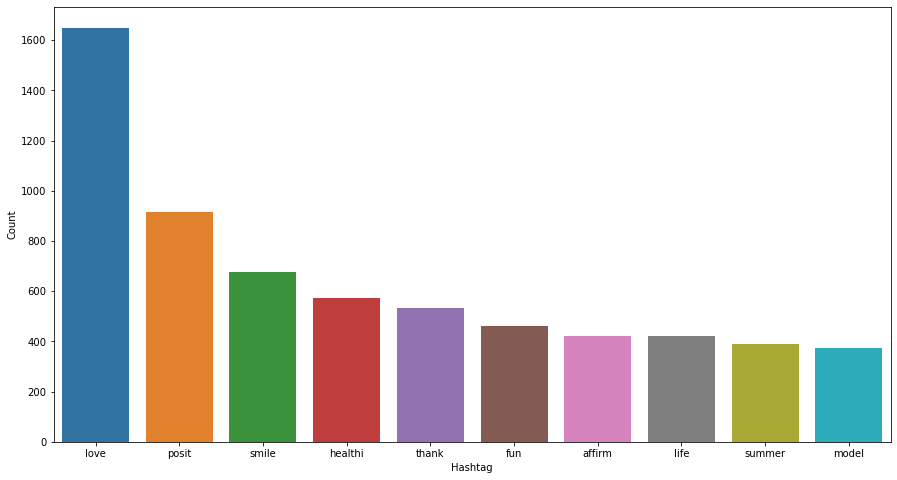

In [93]:
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Hashtag',y='Count')

<AxesSubplot:xlabel='Hashtag', ylabel='Count'>

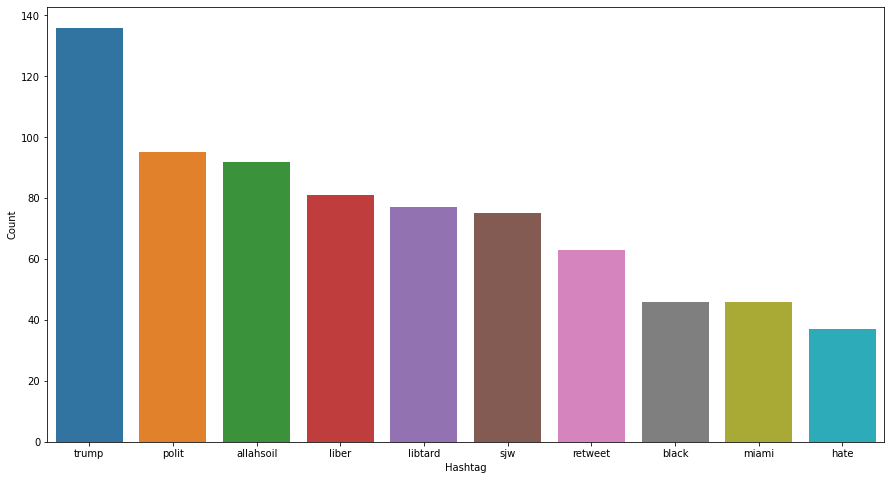

In [94]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(15,8))
sns.barplot(data=d,x='Hashtag',y='Count')

# input split

In [95]:
## feature extraction

In [123]:
from sklearn.feature_extraction.text import CountVectorizer 
##will generate the matrix containing the words and the occurence of words. (Bag of words)##

In [100]:
BOW_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')

In [101]:
bow =BOW_vectorizer.fit_transform(df['Clean_Tweet'])

In [102]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 125006 stored elements in Compressed Sparse Row format>

In [119]:
from sklearn.model_selection import train_test_split

In [104]:
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Training

In [111]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [125]:
prediction =model.predict(x_test)
f1_score(y_test,prediction)

0.49763033175355453

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test,prediction)

0.9469403078463271

In [135]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [136]:
accuracy_score(y_test,pred)

0.9433112251282693

In [138]:
pred_prob[0]

array([0.99897991, 0.00102009])

In [139]:
pred_prob[1]

array([0.99095335, 0.00904665])